In [1]:
# Libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Libraries for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Dropout


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset from Google Drive
file_path = '/content/drive/My Drive/ons_deaths_weekly_occurrences_by_la_location.csv'
data = pd.read_csv(file_path)

In [4]:
# Convert 'week_start' and 'week_end' to datetime format
data['week_start'] = pd.to_datetime(data['week_start'])
data['week_end'] = pd.to_datetime(data['week_end'])

# Check for missing values
print(data.isnull().sum())

# Replace missing values or handle them appropriately (if any)
# For example: data = data.fillna(0) if you want to replace missing values with 0

# Ensure the 'deaths' column is numeric
data['deaths'] = pd.to_numeric(data['deaths'], errors='coerce')

area_code         0
area_name         0
place_of_death    0
week_start        0
week_end          0
week_number       0
year              0
cause_of_death    0
deaths            0
dtype: int64


In [5]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Drop rows with missing 'deaths' (if applicable)
data = data.dropna(subset=['deaths'])

# Alternatively, fill missing values (if relevant columns have NaNs)
# For example, replace missing numerical values with 0 or mean:
# data['deaths'] = data['deaths'].fillna(0)

# Ensure all columns are properly formatted
data['deaths'] = pd.to_numeric(data['deaths'], errors='coerce')


area_code         0
area_name         0
place_of_death    0
week_start        0
week_end          0
week_number       0
year              0
cause_of_death    0
deaths            0
dtype: int64


In [6]:
# Convert 'week_start' and 'week_end' to datetime
data['week_start'] = pd.to_datetime(data['week_start'])
data['week_end'] = pd.to_datetime(data['week_end'])

# Check if conversion was successful
print(data[['week_start', 'week_end']].head())


  week_start   week_end
0 2019-12-28 2020-01-03
1 2019-12-28 2020-01-03
2 2019-12-28 2020-01-03
3 2019-12-28 2020-01-03
4 2019-12-28 2020-01-03


In [7]:
# Create a sequential week index starting from 28-12-2019
data['week_sequence'] = ((data['week_start'] - pd.Timestamp('2019-12-28')).dt.days // 7) + 1
print(data[['week_start', 'week_sequence']].head())

  week_start  week_sequence
0 2019-12-28              1
1 2019-12-28              1
2 2019-12-28              1
3 2019-12-28              1
4 2019-12-28              1


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
le_area = LabelEncoder()
le_place = LabelEncoder()
le_cause = LabelEncoder()

data['area_name_encoded'] = le_area.fit_transform(data['area_name'])
data['place_of_death_encoded'] = le_place.fit_transform(data['place_of_death'])
data['cause_of_death_encoded'] = le_cause.fit_transform(data['cause_of_death'])

print(data[['area_name', 'place_of_death', 'cause_of_death',
            'area_name_encoded', 'place_of_death_encoded', 'cause_of_death_encoded']].head())


    area_name place_of_death cause_of_death  area_name_encoded  \
0  Hartlepool      Care home       COVID 19                131   
1  Hartlepool      Elsewhere       COVID 19                131   
2  Hartlepool           Home       COVID 19                131   
3  Hartlepool        Hospice       COVID 19                131   
4  Hartlepool       Hospital       COVID 19                131   

   place_of_death_encoded  cause_of_death_encoded  
0                       0                       0  
1                       1                       0  
2                       2                       0  
3                       3                       0  
4                       4                       0  


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['deaths_scaled'] = scaler.fit_transform(data[['deaths']])
print(data[['deaths', 'deaths_scaled']].head())

   deaths  deaths_scaled
0       0      -0.496336
1       0      -0.496336
2       0      -0.496336
3       0      -0.496336
4       0      -0.496336


In [10]:
features = data[['area_name_encoded', 'place_of_death_encoded', 'week_sequence', 'cause_of_death_encoded']]
target = data['deaths']

print(features.head())
print(target.head())


   area_name_encoded  place_of_death_encoded  week_sequence  \
0                131                       0              1   
1                131                       1              1   
2                131                       2              1   
3                131                       3              1   
4                131                       4              1   

   cause_of_death_encoded  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
0    0
1    0
2    0
3    0
4    0
Name: deaths, dtype: int64


In [11]:
# Split data based on week_sequence
train_data = data[data['week_sequence'] <= 60]
test_data = data[data['week_sequence'] > 60]

# Features and targets
X_train = train_data[['area_name_encoded', 'place_of_death_encoded', 'week_sequence', 'cause_of_death_encoded']]
y_train = train_data['deaths']

X_test = test_data[['area_name_encoded', 'place_of_death_encoded', 'week_sequence', 'cause_of_death_encoded']]
y_test = test_data['deaths']

print("Training Data:", X_train.shape, y_train.shape)
print("Testing Data:", X_test.shape, y_test.shape)

Training Data: (241500, 4) (241500,)
Testing Data: (301872, 4) (301872,)


In [12]:
print("Number of duplicates:", data.duplicated().sum())
data = data.drop_duplicates()

Number of duplicates: 0


In [13]:
print(data.describe())

                          week_start                       week_end  \
count                         543372                         543372   
mean   2021-04-11 19:11:50.841191936  2021-04-17 19:11:50.841191936   
min              2019-12-28 00:00:00            2020-01-03 00:00:00   
25%              2020-08-15 00:00:00            2020-08-21 00:00:00   
50%              2021-04-10 00:00:00            2021-04-16 00:00:00   
75%              2021-12-04 00:00:00            2021-12-10 00:00:00   
max              2022-07-30 00:00:00            2022-08-05 00:00:00   
std                              NaN                            NaN   

         week_number           year         deaths  week_sequence  \
count  543372.000000  543372.000000  543372.000000  543372.000000   
mean       24.317263    2020.833330       2.776013      68.257128   
min         1.000000    2020.000000       0.000000       1.000000   
25%        12.000000    2020.000000       0.000000      34.000000   
50%        23.0

In [14]:
# Group the data by 'week_start' and 'cause_of_death', summing the deaths for each group
weekly_deaths = data.groupby(['week_start', 'cause_of_death'])['deaths'].sum().reset_index()

# Pivot the data to separate columns for COVID-19 and Non-COVID-19 deaths
weekly_deaths_pivot = weekly_deaths.pivot(index='week_start', columns='cause_of_death', values='deaths').fillna(0)

# Add a column for total deaths (COVID-19 + Non-COVID-19)
weekly_deaths_pivot['Total_Deaths'] = weekly_deaths_pivot.sum(axis=1)

# Reset index for easier access
weekly_deaths_pivot = weekly_deaths_pivot.reset_index()

# Rename columns for clarity
weekly_deaths_pivot.columns = ['Week Start', 'COVID-19 Deaths', 'Non-COVID-19 Deaths', 'Total Deaths']

# Display the first few rows
print(weekly_deaths_pivot.head())

# Print the total deaths for each week from 28-12-2019 to the last week
print(weekly_deaths_pivot.to_string(index=False))


  Week Start  COVID-19 Deaths  Non-COVID-19 Deaths  Total Deaths
0 2019-12-28                0                12453         12453
1 2020-01-04                0                12142         12142
2 2020-01-11                0                11725         11725
3 2020-01-18                0                10897         10897
4 2020-01-25                1                11130         11131
Week Start  COVID-19 Deaths  Non-COVID-19 Deaths  Total Deaths
2019-12-28                0                12453         12453
2020-01-04                0                12142         12142
2020-01-11                0                11725         11725
2020-01-18                0                10897         10897
2020-01-25                1                11130         11131
2020-02-01                1                10747         10748
2020-02-08                0                10873         10873
2020-02-15                0                10807         10807
2020-02-22                1                

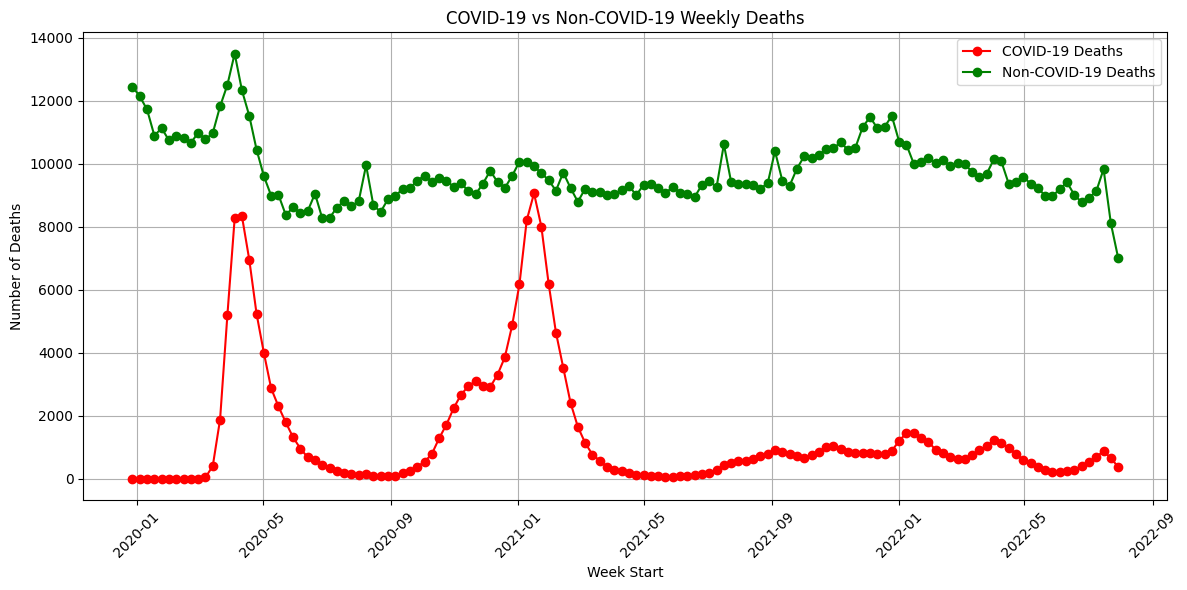

In [15]:
import matplotlib.pyplot as plt

# Group the data by 'week_start' and 'cause_of_death', summing the deaths
weekly_deaths = data.groupby(['week_start', 'cause_of_death'])['deaths'].sum().reset_index()

# Pivot the data for plotting
weekly_deaths_pivot = weekly_deaths.pivot(index='week_start', columns='cause_of_death', values='deaths').fillna(0)

# Plot COVID-19 vs Non-COVID-19 deaths over time
plt.figure(figsize=(12, 6))
plt.plot(weekly_deaths_pivot.index, weekly_deaths_pivot['COVID 19'], label='COVID-19 Deaths', color='red', marker='o')
plt.plot(weekly_deaths_pivot.index, weekly_deaths_pivot['Non COVID 19'], label='Non-COVID-19 Deaths', color='green', marker='o')
plt.title("COVID-19 vs Non-COVID-19 Weekly Deaths")
plt.xlabel("Week Start")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
print(weekly_deaths_pivot.columns)
# Ensure 'week_start' is accessible
weekly_deaths_pivot.reset_index(inplace=True)

# Verify the column names
print(weekly_deaths_pivot.columns)


Index(['COVID 19', 'Non COVID 19'], dtype='object', name='cause_of_death')
Index(['week_start', 'COVID 19', 'Non COVID 19'], dtype='object', name='cause_of_death')


Columns in DataFrame: Index(['week_start', 'COVID 19', 'Non COVID 19'], dtype='object', name='cause_of_death')
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9400
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6492 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6567 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6646
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6270
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6469
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5126
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5534 
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3568
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2998
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5010
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2901
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1639
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1518
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1827
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss

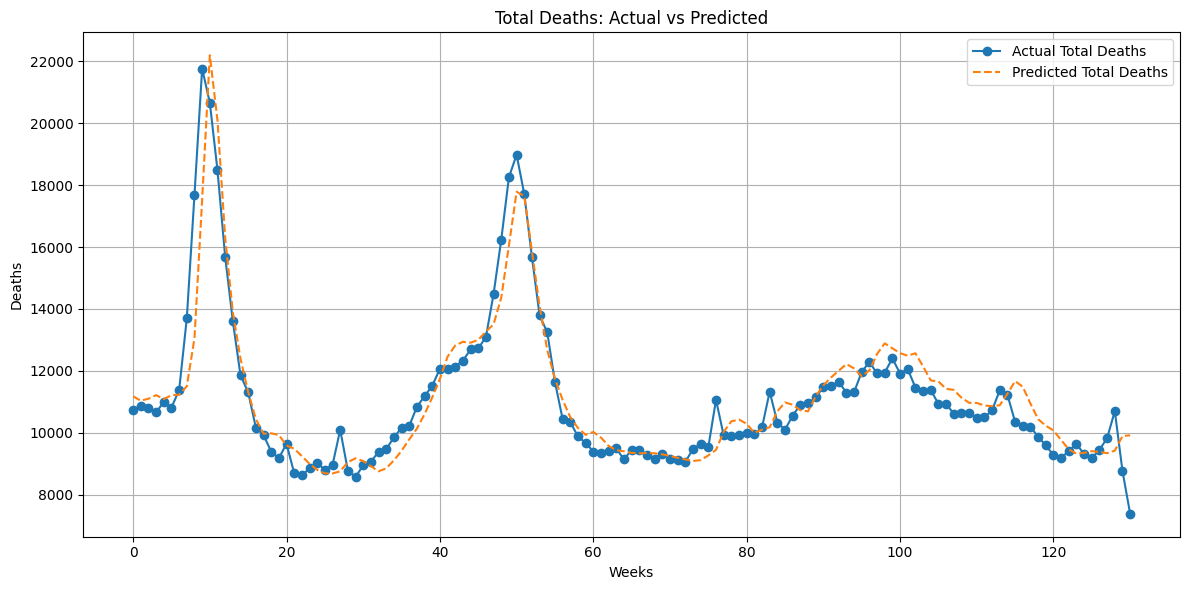

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.0061
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5585
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5201
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6239 
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5735
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5907
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4572
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4548
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3499
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3914
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2584
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2827
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1731
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2302 
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2498
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

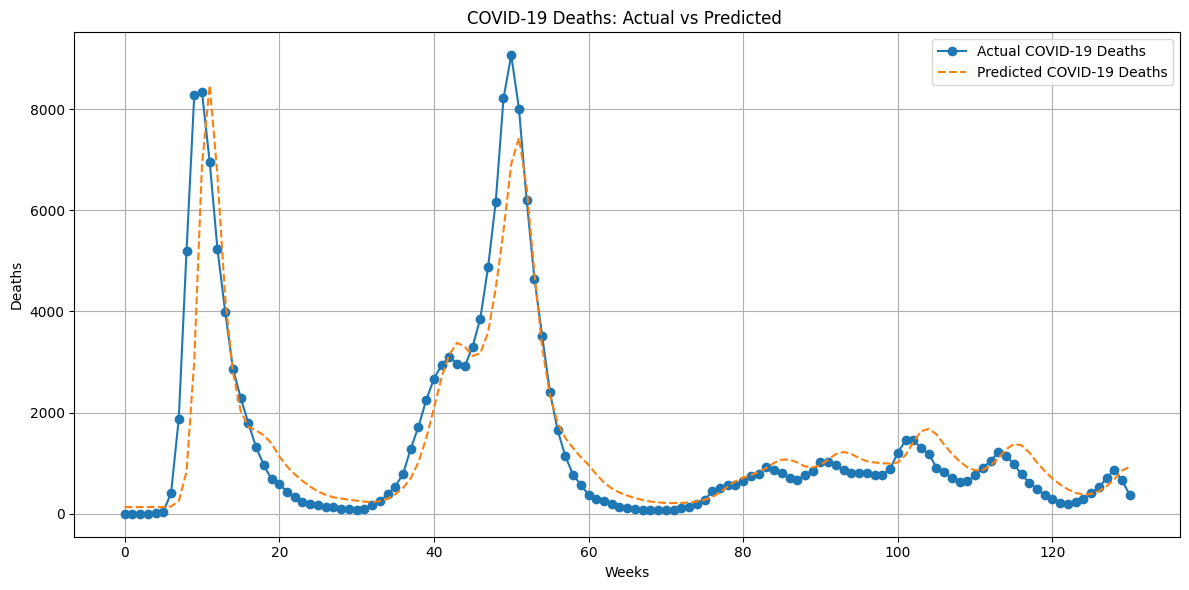

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.9941
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5451 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4182
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4629
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4033
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4372
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3538
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3020
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3383
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3360
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3978
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3333
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3544
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3498
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3539
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


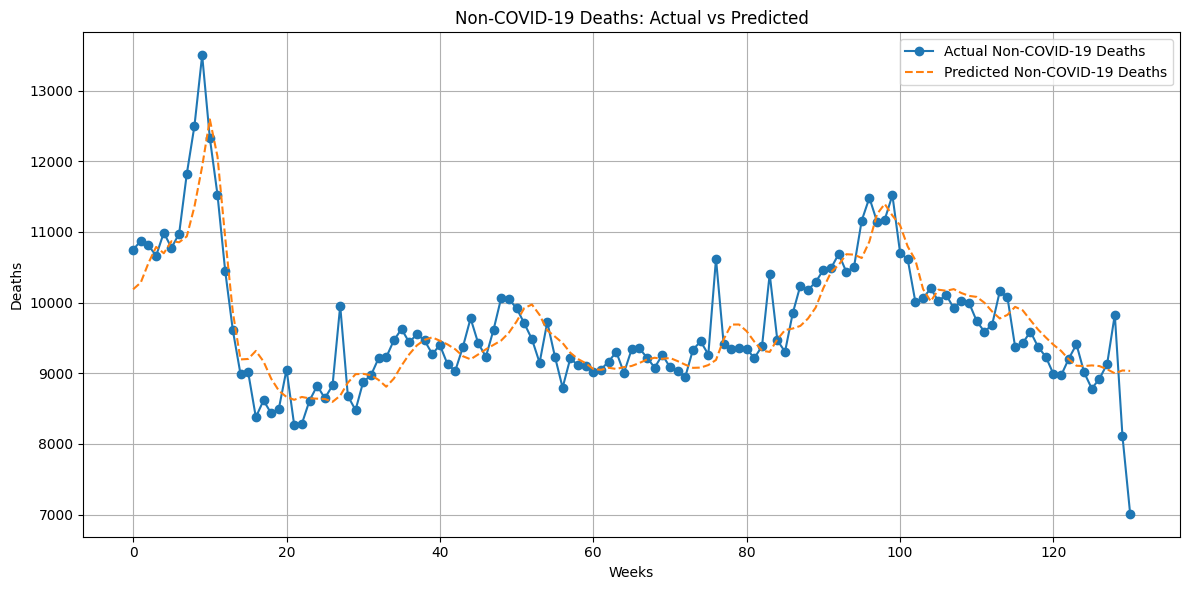

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming `weekly_deaths_pivot` DataFrame is already created with appropriate columns
# Rename columns if necessary to standardize names
weekly_deaths_pivot.columns = weekly_deaths_pivot.columns.str.strip()  # Strip any extra spaces

# Check column names
print("Columns in DataFrame:", weekly_deaths_pivot.columns)

# 1. Create Total Deaths column by summing COVID and Non-COVID deaths
weekly_deaths_pivot['Total Deaths'] = (
    weekly_deaths_pivot['COVID 19'] + weekly_deaths_pivot['Non COVID 19']
)

# Prepare the function to create data for LSTM
def create_lstm_data(series, time_steps=1):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:(i + time_steps), 0])
        y.append(series[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 5  # You can adjust this for a longer lookback period

# Function to build an LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')  # MSE as the loss function
    return model

# 2. Scaling and training for Total Deaths
scaler_total = StandardScaler()
total_deaths_scaled = scaler_total.fit_transform(
    weekly_deaths_pivot['Total Deaths'].values.reshape(-1, 1)
)

X_total, y_total = create_lstm_data(total_deaths_scaled, time_steps)
X_total = X_total.reshape((X_total.shape[0], X_total.shape[1], 1))

model_total = build_lstm_model()
history_total = model_total.fit(X_total, y_total, epochs=20, batch_size=16, verbose=1)

y_total_pred = model_total.predict(X_total)
y_total_pred_rescaled = scaler_total.inverse_transform(y_total_pred)
y_total_rescaled = scaler_total.inverse_transform(y_total.reshape(-1, 1))

# Plot Total Deaths Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_total_rescaled, label='Actual Total Deaths', marker='o')
plt.plot(y_total_pred_rescaled, label='Predicted Total Deaths', linestyle='--')
plt.title(
    f'Total Deaths: Actual vs Predicted')
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Scaling and training for COVID-19 Deaths
scaler_covid = StandardScaler()
covid_deaths_scaled = scaler_covid.fit_transform(
    weekly_deaths_pivot['COVID 19'].values.reshape(-1, 1)
)

X_covid, y_covid = create_lstm_data(covid_deaths_scaled, time_steps)
X_covid = X_covid.reshape((X_covid.shape[0], X_covid.shape[1], 1))

model_covid = build_lstm_model()
history_covid = model_covid.fit(X_covid, y_covid, epochs=20, batch_size=16, verbose=1)

y_covid_pred = model_covid.predict(X_covid)
y_covid_pred_rescaled = scaler_covid.inverse_transform(y_covid_pred)
y_covid_rescaled = scaler_covid.inverse_transform(y_covid.reshape(-1, 1))

# Plot COVID-19 Deaths Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_covid_rescaled, label='Actual COVID-19 Deaths', marker='o')
plt.plot(y_covid_pred_rescaled, label='Predicted COVID-19 Deaths', linestyle='--')
plt.title(
    f'COVID-19 Deaths: Actual vs Predicted '
)
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Scaling and training for Non-COVID-19 Deaths
scaler_non_covid = StandardScaler()
non_covid_deaths_scaled = scaler_non_covid.fit_transform(
    weekly_deaths_pivot['Non COVID 19'].values.reshape(-1, 1)
)

X_non_covid, y_non_covid = create_lstm_data(non_covid_deaths_scaled, time_steps)
X_non_covid = X_non_covid.reshape((X_non_covid.shape[0], X_non_covid.shape[1], 1))

model_non_covid = build_lstm_model()
history_non_covid = model_non_covid.fit(X_non_covid, y_non_covid, epochs=20, batch_size=16, verbose=1)

y_non_covid_pred = model_non_covid.predict(X_non_covid)
y_non_covid_pred_rescaled = scaler_non_covid.inverse_transform(y_non_covid_pred)
y_non_covid_rescaled = scaler_non_covid.inverse_transform(y_non_covid.reshape(-1, 1))

# Plot Non-COVID-19 Deaths Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_non_covid_rescaled, label='Actual Non-COVID-19 Deaths', marker='o')
plt.plot(y_non_covid_pred_rescaled, label='Predicted Non-COVID-19 Deaths', linestyle='--')
plt.title(
    f'Non-COVID-19 Deaths: Actual vs Predicted'
)
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
if 'Total Deaths' not in weekly_deaths_pivot.columns:
    weekly_deaths_pivot['Total Deaths'] = weekly_deaths_pivot['COVID 19'] + weekly_deaths_pivot['Non COVID 19']

weekly_deaths_pivot['week_start'] = pd.to_datetime(weekly_deaths_pivot['week_start'])
weekly_deaths_pivot['week_number'] = ((weekly_deaths_pivot['week_start'] - pd.Timestamp('2019-12-28')).dt.days // 7) + 1

print(weekly_deaths_pivot[['week_start', 'week_number', 'COVID 19', 'Non COVID 19', 'Total Deaths']].head())


cause_of_death week_start  week_number  COVID 19  Non COVID 19  Total Deaths
0              2019-12-28            1         0         12453         12453
1              2020-01-04            2         0         12142         12142
2              2020-01-11            3         0         11725         11725
3              2020-01-18            4         0         10897         10897
4              2020-01-25            5         1         11130         11131


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0817  
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0692 
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0445 
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0444 
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313 
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0312 
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0348  
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0287  
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

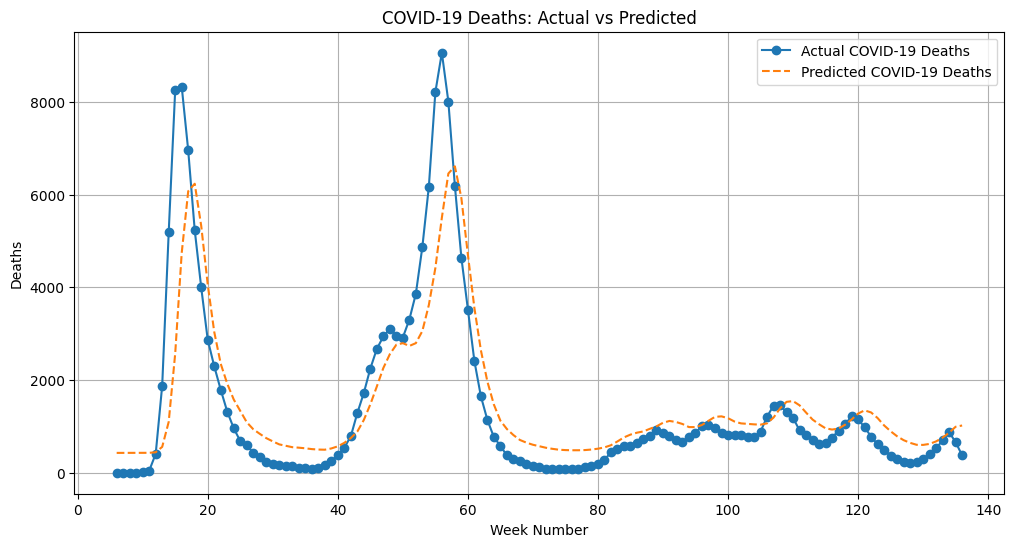

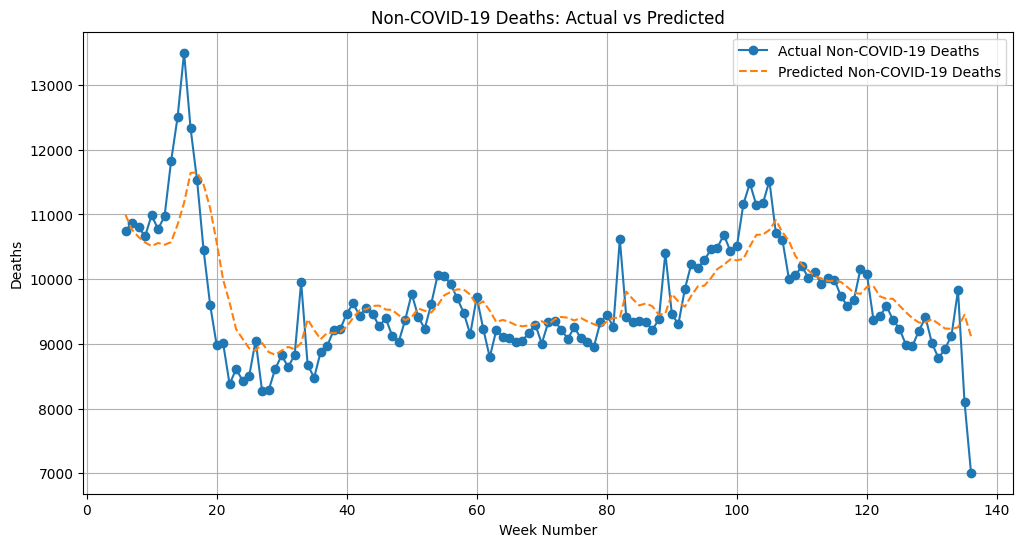

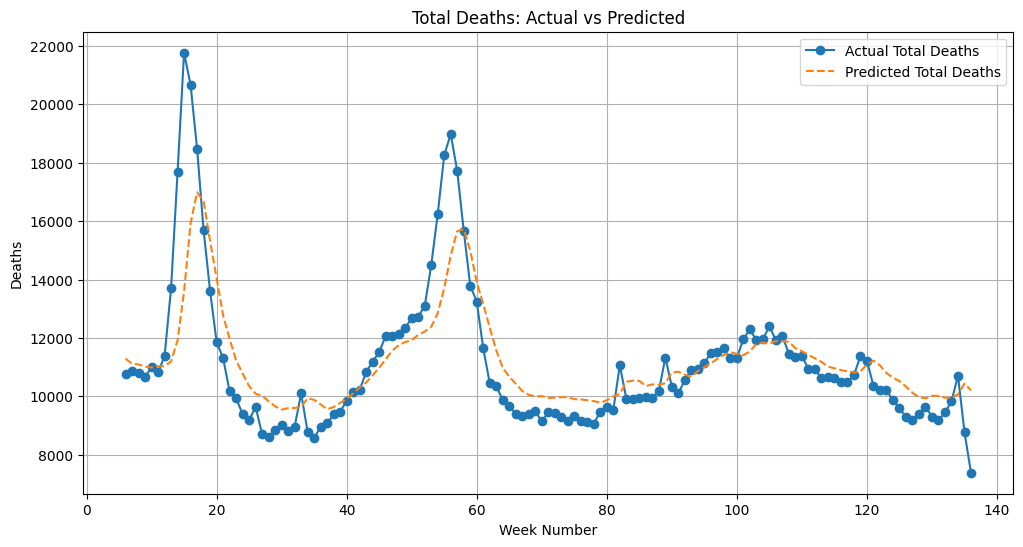

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Ensure required columns exist
if not all(col in weekly_deaths_pivot.columns for col in ['COVID 19', 'Non COVID 19', 'Total Deaths']):
    print("Error: Required columns not found in the dataset.")
else:
    # Prepare data for COVID-19 deaths
    data_covid = weekly_deaths_pivot['COVID 19'].values

    # Prepare data for Non-COVID-19 deaths
    data_non_covid = weekly_deaths_pivot['Non COVID 19'].values

    # Prepare data for Total Deaths
    data_total = weekly_deaths_pivot['Total Deaths'].values

    # Normalize the data
    scaler_covid = MinMaxScaler(feature_range=(0, 1))
    scaler_non_covid = MinMaxScaler(feature_range=(0, 1))
    scaler_total = MinMaxScaler(feature_range=(0, 1))

    data_covid_scaled = scaler_covid.fit_transform(data_covid.reshape(-1, 1))
    data_non_covid_scaled = scaler_non_covid.fit_transform(data_non_covid.reshape(-1, 1))
    data_total_scaled = scaler_total.fit_transform(data_total.reshape(-1, 1))

    # Create sequences for CNN with week numbers
    def create_sequences_with_weeks(data, weeks, time_steps=5):
        X, y, week_seq = [], [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i + time_steps, 0])
            y.append(data[i + time_steps, 0])
            week_seq.append(weeks[i + time_steps])  # Track the week number for the current sequence
        return np.array(X), np.array(y), np.array(week_seq)

    weeks = weekly_deaths_pivot['week_number'].values
    time_steps = 5

    # Create sequences for COVID-19, Non-COVID-19, and Total Deaths
    X_covid, y_covid, week_seq_covid = create_sequences_with_weeks(data_covid_scaled, weeks, time_steps)
    X_non_covid, y_non_covid, week_seq_non_covid = create_sequences_with_weeks(data_non_covid_scaled, weeks, time_steps)
    X_total, y_total, week_seq_total = create_sequences_with_weeks(data_total_scaled, weeks, time_steps)

    # Split into training and testing sets
    split = int(len(X_covid) * 0.8)
    X_covid_train, X_covid_test = X_covid[:split], X_covid[split:]
    y_covid_train, y_covid_test = y_covid[:split], y_covid[split:]
    week_seq_covid_test = week_seq_covid[split:]

    X_non_covid_train, X_non_covid_test = X_non_covid[:split], X_non_covid[split:]
    y_non_covid_train, y_non_covid_test = y_non_covid[:split], y_non_covid[split:]
    week_seq_non_covid_test = week_seq_non_covid[split:]

    X_total_train, X_total_test = X_total[:split], X_total[split:]
    y_total_train, y_total_test = y_total[:split], y_total[split:]
    week_seq_total_test = week_seq_total[split:]

    # Define the CNN model
    def build_cnn():
        model = Sequential()
        model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(time_steps, 1)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        return model

    # Train CNN for COVID-19 deaths
    model_covid = build_cnn()
    history_covid = model_covid.fit(X_covid_train, y_covid_train, epochs=20, batch_size=16, verbose=1)

    # Train CNN for Non-COVID-19 deaths
    model_non_covid = build_cnn()
    history_non_covid = model_non_covid.fit(X_non_covid_train, y_non_covid_train, epochs=20, batch_size=16, verbose=1)

    # Train CNN for Total Deaths
    model_total = build_cnn()
    history_total = model_total.fit(X_total_train, y_total_train, epochs=20, batch_size=16, verbose=1)

    # Make predictions
    y_covid_pred = model_covid.predict(X_covid)
    y_non_covid_pred = model_non_covid.predict(X_non_covid)
    y_total_pred = model_total.predict(X_total)

    # Inverse transform predictions and actual values
    y_covid_pred_rescaled = scaler_covid.inverse_transform(y_covid_pred)
    y_covid_rescaled = scaler_covid.inverse_transform(y_covid.reshape(-1, 1))

    y_non_covid_pred_rescaled = scaler_non_covid.inverse_transform(y_non_covid_pred)
    y_non_covid_rescaled = scaler_non_covid.inverse_transform(y_non_covid.reshape(-1, 1))

    y_total_pred_rescaled = scaler_total.inverse_transform(y_total_pred)
    y_total_rescaled = scaler_total.inverse_transform(y_total.reshape(-1, 1))


    # Plot Predictions vs Actual for COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_covid, y_covid_rescaled, label='Actual COVID-19 Deaths', marker='o')
    plt.plot(week_seq_covid, y_covid_pred_rescaled, label='Predicted COVID-19 Deaths', linestyle='--')
    plt.title(f'COVID-19 Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Non-COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_non_covid, y_non_covid_rescaled, label='Actual Non-COVID-19 Deaths', marker='o')
    plt.plot(week_seq_non_covid, y_non_covid_pred_rescaled, label='Predicted Non-COVID-19 Deaths', linestyle='--')
    plt.title(f'Non-COVID-19 Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Total Deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_total, y_total_rescaled, label='Actual Total Deaths', marker='o')
    plt.plot(week_seq_total, y_total_pred_rescaled, label='Predicted Total Deaths', linestyle='--')
    plt.title(f'Total Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()


COVID-19 RMSE: 271.91
Non-COVID-19 RMSE: 386.83
Total Deaths RMSE: 542.48


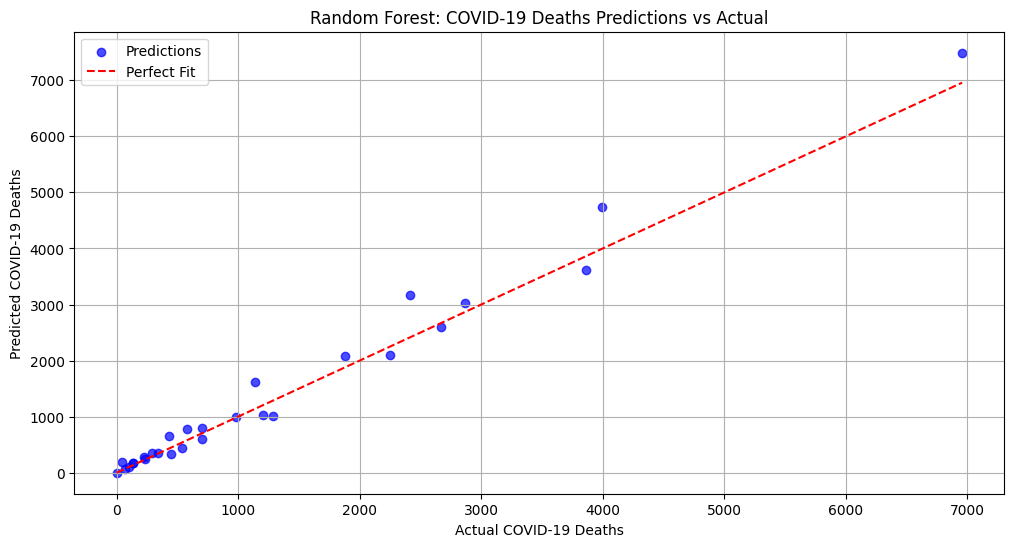

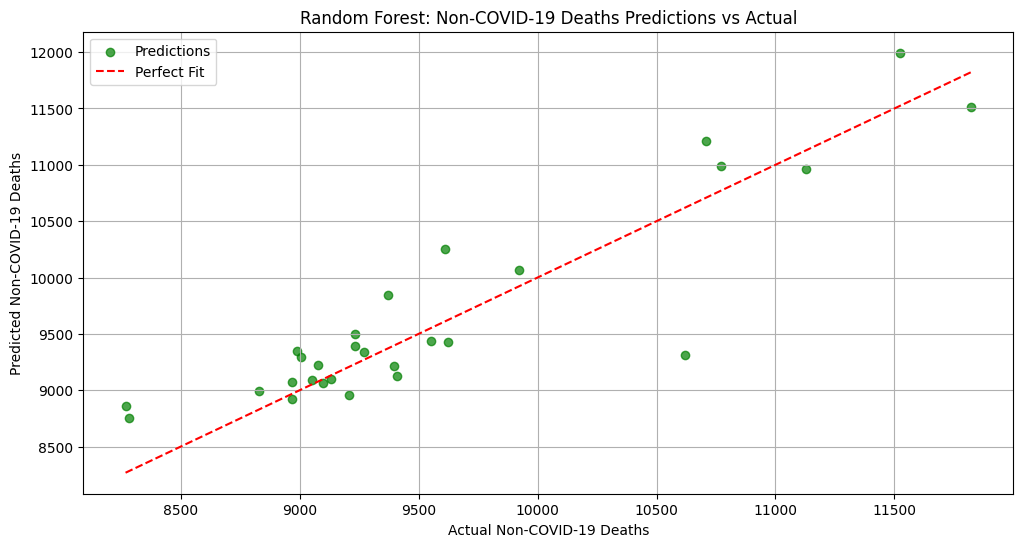

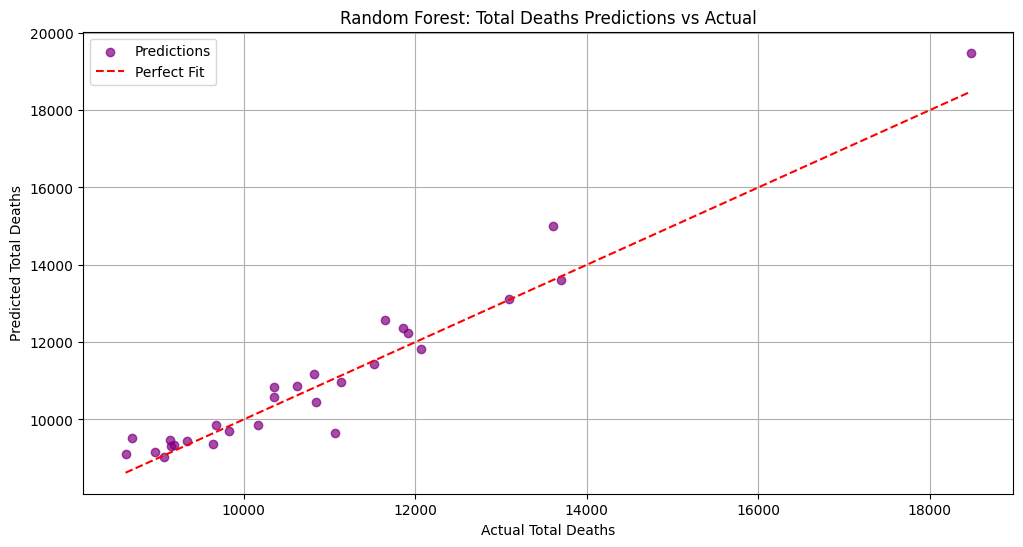

<ipython-input-20-c12a07db27f5>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')


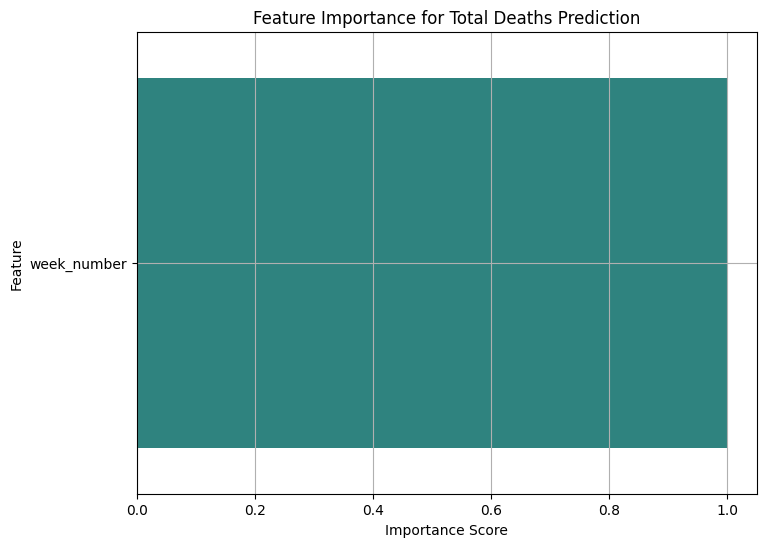

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist
if not all(col in weekly_deaths_pivot.columns for col in ['COVID 19', 'Non COVID 19', 'Total Deaths', 'week_number']):
    print("Error: Required columns not found in the dataset.")
else:
    # Prepare features and targets
    features = weekly_deaths_pivot[['week_number']].copy()  # Use week_number as a feature
    target_covid = weekly_deaths_pivot['COVID 19']
    target_non_covid = weekly_deaths_pivot['Non COVID 19']
    target_total = weekly_deaths_pivot['Total Deaths']

    # Split data into training and testing sets for each target
    X_train_covid, X_test_covid, y_train_covid, y_test_covid = train_test_split(features, target_covid, test_size=0.2, random_state=42)
    X_train_non_covid, X_test_non_covid, y_train_non_covid, y_test_non_covid = train_test_split(features, target_non_covid, test_size=0.2, random_state=42)
    X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, target_total, test_size=0.2, random_state=42)

    # Initialize Random Forest models
    rf_covid = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_non_covid = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_total = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the models
    rf_covid.fit(X_train_covid, y_train_covid)
    rf_non_covid.fit(X_train_non_covid, y_train_non_covid)
    rf_total.fit(X_train_total, y_train_total)

    # Make predictions
    y_pred_covid = rf_covid.predict(X_test_covid)
    y_pred_non_covid = rf_non_covid.predict(X_test_non_covid)
    y_pred_total = rf_total.predict(X_test_total)

    # Evaluate the models
    rmse_covid = np.sqrt(mean_squared_error(y_test_covid, y_pred_covid))
    rmse_non_covid = np.sqrt(mean_squared_error(y_test_non_covid, y_pred_non_covid))
    rmse_total = np.sqrt(mean_squared_error(y_test_total, y_pred_total))

    print(f"COVID-19 RMSE: {rmse_covid:.2f}")
    print(f"Non-COVID-19 RMSE: {rmse_non_covid:.2f}")
    print(f"Total Deaths RMSE: {rmse_total:.2f}")

    # Plot Predictions vs Actual for COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_covid, y_pred_covid, alpha=0.7, label='Predictions', color='blue')
    plt.plot([y_test_covid.min(), y_test_covid.max()], [y_test_covid.min(), y_test_covid.max()], 'r--', label='Perfect Fit')
    plt.title('Random Forest: COVID-19 Deaths Predictions vs Actual')
    plt.xlabel('Actual COVID-19 Deaths')
    plt.ylabel('Predicted COVID-19 Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Non-COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_non_covid, y_pred_non_covid, alpha=0.7, label='Predictions', color='green')
    plt.plot([y_test_non_covid.min(), y_test_non_covid.max()], [y_test_non_covid.min(), y_test_non_covid.max()], 'r--', label='Perfect Fit')
    plt.title('Random Forest: Non-COVID-19 Deaths Predictions vs Actual')
    plt.xlabel('Actual Non-COVID-19 Deaths')
    plt.ylabel('Predicted Non-COVID-19 Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Total Deaths
    plt.figure(figsize=(12, 6))
    plt.scatter(y_test_total, y_pred_total, alpha=0.7, label='Predictions', color='purple')
    plt.plot([y_test_total.min(), y_test_total.max()], [y_test_total.min(), y_test_total.max()], 'r--', label='Perfect Fit')
    plt.title('Random Forest: Total Deaths Predictions vs Actual')
    plt.xlabel('Actual Total Deaths')
    plt.ylabel('Predicted Total Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Feature Importance for Total Deaths
    feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': rf_total.feature_importances_})
    plt.figure(figsize=(8, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title('Feature Importance for Total Deaths Prediction')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Random Forest RMSE: 5.042557181595148
LSTM RMSE: 5.138201017421815
CNN RMSE: 5.537916228967139


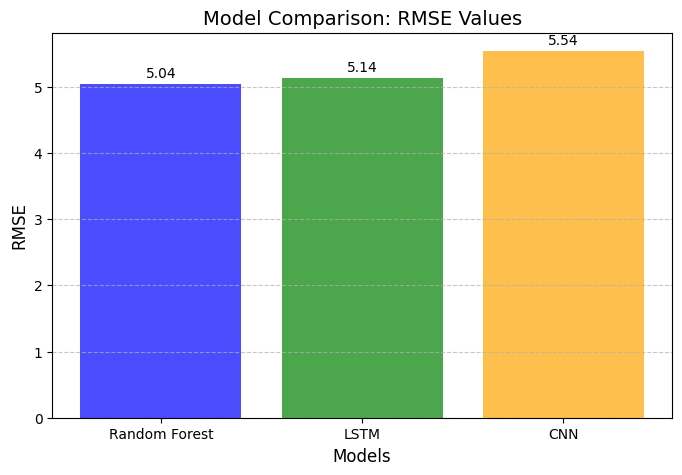

Random Forest is the most accurate model.


In [21]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/drive/My Drive/ons_deaths_weekly_occurrences_by_la_location.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder_area = LabelEncoder()
data['area_name_encoded'] = label_encoder_area.fit_transform(data['area_name'])

label_encoder_place = LabelEncoder()
data['place_of_death_encoded'] = label_encoder_place.fit_transform(data['place_of_death'])

# Use a subset of the data for faster runtime
data_sampled = data.sample(frac=0.2, random_state=42)  # Use 20% of the data
X = data_sampled[['week_number', 'area_name_encoded', 'place_of_death_encoded']].values
y = data_sampled['deaths'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)  # Fewer estimators
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

# LSTM Model
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm_model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # Fewer units
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=8, verbose=0)  # Fewer epochs, smaller batch size
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, lstm_predictions))

# CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  # Fewer filters
    Flatten(),
    Dense(1)
])
cnn_model.compile(optimizer='adam', loss='mse')
cnn_model.fit(X_train_lstm, y_train, epochs=5, batch_size=8, verbose=0)  # Fewer epochs, smaller batch size
cnn_predictions = cnn_model.predict(X_test_lstm)
cnn_rmse = np.sqrt(mean_squared_error(y_test, cnn_predictions))

# Display RMSE for each model
print(f"Random Forest RMSE: {rf_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"CNN RMSE: {cnn_rmse}")

# Plot RMSE values for comparison
models = ['Random Forest', 'LSTM', 'CNN']
rmse_values = [rf_rmse, lstm_rmse, cnn_rmse]

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title('Model Comparison: RMSE Values', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)
plt.show()

# Determine the most accurate model
min_rmse = min(rf_rmse, lstm_rmse, cnn_rmse)
if min_rmse == rf_rmse:
    print("Random Forest is the most accurate model.")
elif min_rmse == lstm_rmse:
    print("LSTM is the most accurate model.")
else:
    print("CNN is the most accurate model.")


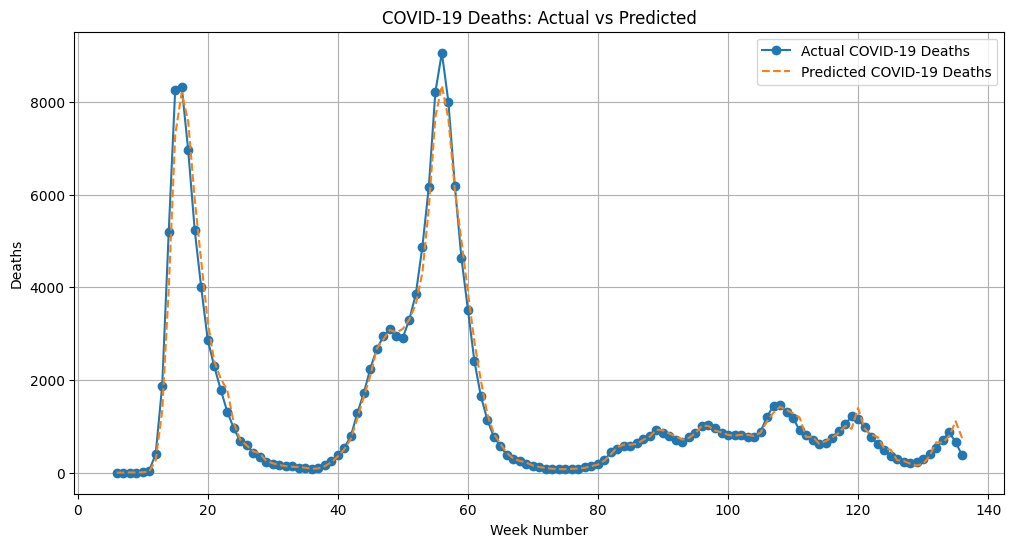

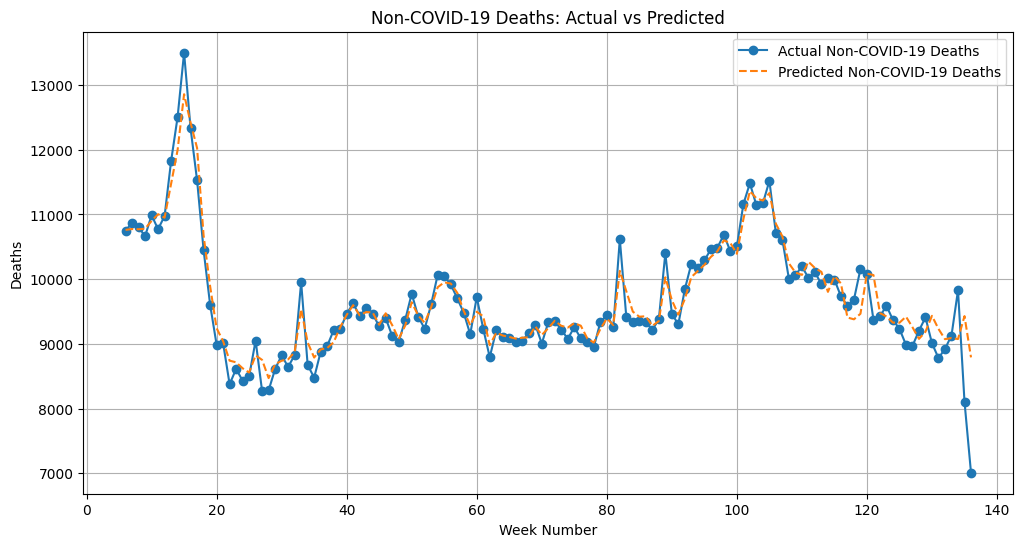

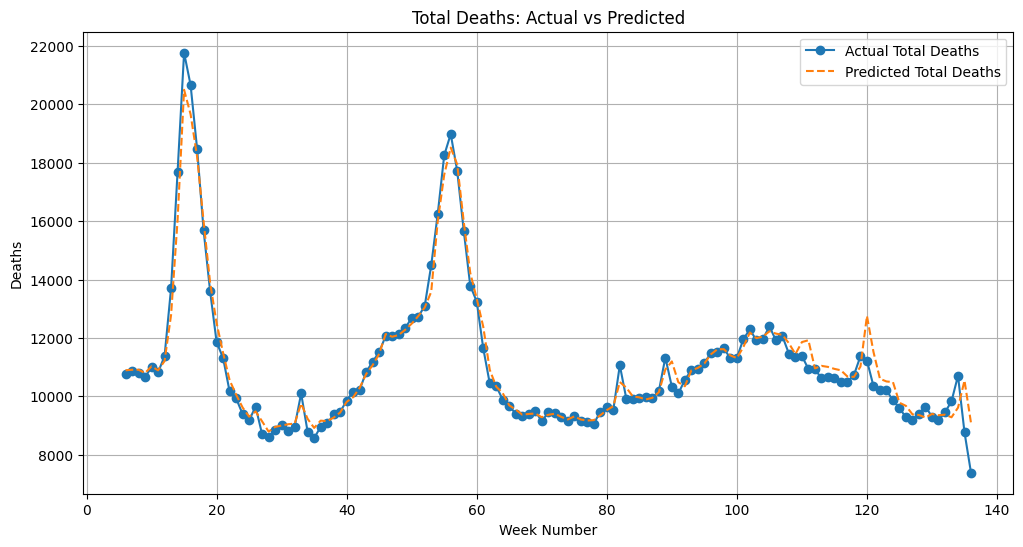

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ensure required columns exist
if not all(col in weekly_deaths_pivot.columns for col in ['COVID 19', 'Non COVID 19', 'Total Deaths']):
    print("Error: Required columns not found in the dataset.")
else:
    # Prepare data for COVID-19 deaths
    data_covid = weekly_deaths_pivot['COVID 19'].values

    # Prepare data for Non-COVID-19 deaths
    data_non_covid = weekly_deaths_pivot['Non COVID 19'].values

    # Prepare data for Total Deaths
    data_total = weekly_deaths_pivot['Total Deaths'].values

    # Normalize the data
    scaler_covid = MinMaxScaler(feature_range=(0, 1))
    scaler_non_covid = MinMaxScaler(feature_range=(0, 1))
    scaler_total = MinMaxScaler(feature_range=(0, 1))

    data_covid_scaled = scaler_covid.fit_transform(data_covid.reshape(-1, 1))
    data_non_covid_scaled = scaler_non_covid.fit_transform(data_non_covid.reshape(-1, 1))
    data_total_scaled = scaler_total.fit_transform(data_total.reshape(-1, 1))

    # Create sequences for Random Forest with week numbers
    def create_sequences_with_weeks(data, weeks, time_steps=5):
        X, y, week_seq = [], [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i + time_steps, 0])
            y.append(data[i + time_steps, 0])
            week_seq.append(weeks[i + time_steps])  # Track the week number for the current sequence
        return np.array(X), np.array(y), np.array(week_seq)

    weeks = weekly_deaths_pivot['week_number'].values
    time_steps = 5

    # Create sequences for COVID-19, Non-COVID-19, and Total Deaths
    X_covid, y_covid, week_seq_covid = create_sequences_with_weeks(data_covid_scaled, weeks, time_steps)
    X_non_covid, y_non_covid, week_seq_non_covid = create_sequences_with_weeks(data_non_covid_scaled, weeks, time_steps)
    X_total, y_total, week_seq_total = create_sequences_with_weeks(data_total_scaled, weeks, time_steps)

    # Split into training and testing sets
    split = int(len(X_covid) * 0.8)
    X_covid_train, X_covid_test = X_covid[:split], X_covid[split:]
    y_covid_train, y_covid_test = y_covid[:split], y_covid[split:]
    week_seq_covid_test = week_seq_covid[split:]

    X_non_covid_train, X_non_covid_test = X_non_covid[:split], X_non_covid[split:]
    y_non_covid_train, y_non_covid_test = y_non_covid[:split], y_non_covid[split:]
    week_seq_non_covid_test = week_seq_non_covid[split:]

    X_total_train, X_total_test = X_total[:split], X_total[split:]
    y_total_train, y_total_test = y_total[:split], y_total[split:]
    week_seq_total_test = week_seq_total[split:]

    # Train Random Forest for COVID-19 deaths
    rf_covid = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_covid.fit(X_covid_train, y_covid_train)
    y_covid_pred = rf_covid.predict(X_covid)

    # Train Random Forest for Non-COVID-19 deaths
    rf_non_covid = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_non_covid.fit(X_non_covid_train, y_non_covid_train)
    y_non_covid_pred = rf_non_covid.predict(X_non_covid)

    # Train Random Forest for Total Deaths
    rf_total = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_total.fit(X_total_train, y_total_train)
    y_total_pred = rf_total.predict(X_total)

    # Inverse transform predictions and actual values
    y_covid_pred_rescaled = scaler_covid.inverse_transform(y_covid_pred.reshape(-1, 1))
    y_covid_rescaled = scaler_covid.inverse_transform(y_covid.reshape(-1, 1))

    y_non_covid_pred_rescaled = scaler_non_covid.inverse_transform(y_non_covid_pred.reshape(-1, 1))
    y_non_covid_rescaled = scaler_non_covid.inverse_transform(y_non_covid.reshape(-1, 1))

    y_total_pred_rescaled = scaler_total.inverse_transform(y_total_pred.reshape(-1, 1))
    y_total_rescaled = scaler_total.inverse_transform(y_total.reshape(-1, 1))

    # Plot Predictions vs Actual for COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_covid, y_covid_rescaled, label='Actual COVID-19 Deaths', marker='o')
    plt.plot(week_seq_covid, y_covid_pred_rescaled, label='Predicted COVID-19 Deaths', linestyle='--')
    plt.title(f'COVID-19 Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Non-COVID-19 deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_non_covid, y_non_covid_rescaled, label='Actual Non-COVID-19 Deaths', marker='o')
    plt.plot(week_seq_non_covid, y_non_covid_pred_rescaled, label='Predicted Non-COVID-19 Deaths', linestyle='--')
    plt.title(f'Non-COVID-19 Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Predictions vs Actual for Total Deaths
    plt.figure(figsize=(12, 6))
    plt.plot(week_seq_total, y_total_rescaled, label='Actual Total Deaths', marker='o')
    plt.plot(week_seq_total, y_total_pred_rescaled, label='Predicted Total Deaths', linestyle='--')
    plt.title(f'Total Deaths: Actual vs Predicted')
    plt.xlabel('Week Number')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid()
    plt.show()
